In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df = df.fillna(0)

In [6]:
df.replace({'No phone service':"No", 'No internet service':"No"},inplace=True)

In [7]:
df.replace({'No':0, 'Yes':1},inplace=True)

In [8]:
df.replace({'Male':0, 'Female':1},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [10]:
df = pd.get_dummies(data = df , columns = ["InternetService","Contract","PaymentMethod"], drop_first = True)

In [11]:
X = df.drop("Churn", axis = True)
y = df.Churn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
y_train_reshaped = tf.reshape(y_train, [5634, 1])

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, input_shape=(23,), activation='sigmoid')
  
])

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
177/177 [==============================] - 4s 2ms/step - loss: 129.0342 - accuracy: 0.7334
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 60.2945 - accuracy: 0.7409
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 10.6286 - accuracy: 0.5877
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 4.9392 - accuracy: 0.5240
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 2.8222 - accuracy: 0.5289
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 1.4102 - accuracy: 0.5800
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6816
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7673
Epoch 9/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7744
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5618 - ac

177/177 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.7895
Epoch 82/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7936
Epoch 83/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7824
Epoch 84/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7845
Epoch 85/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7898
Epoch 86/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7877
Epoch 87/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7863
Epoch 88/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7859
Epoch 89/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7884
Epoch 90/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 

177/177 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.7909
Epoch 161/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.7890
Epoch 162/200
177/177 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7826
Epoch 163/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7813
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.7945
Epoch 165/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7906
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7898
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7930
Epoch 168/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7918
Epoch 169/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4767 - a

In [18]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8197


[0.39893245697021484, 0.819730281829834]

In [19]:
y_pred = model.predict(X_train)
y_pred

177/177 [==============================] - 0s 1ms/step


array([[0.0728495 ],
       [0.07100006],
       [0.68106794],
       ...,
       [0.22082154],
       [0.8073896 ],
       [0.03287124]], dtype=float32)

In [20]:
y_predict = []
for i in y_pred:
    if i < 0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)       

In [21]:
cf = tf.math.confusion_matrix(labels = y_train_reshaped, predictions =y_predict)

<AxesSubplot:>

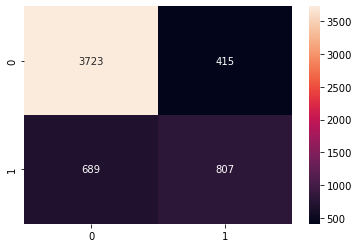

In [22]:
sns.heatmap(cf ,annot=True, fmt = 'd')

In [23]:
df0 = df[df["Churn"]==0]
df1 = df[df["Churn"]==1]

In [24]:
df0.shape

(5174, 24)

In [25]:
df1.shape

(1869, 24)

In [26]:
reduced = df0.sample(df0.shape[0])

In [27]:
low = pd.concat([reduced,df1])

In [28]:
X_low = low.drop("Churn", axis = 1)
y_low = low.Churn

In [29]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.20, random_state=42)

In [30]:
model.fit(X_low_train, y_low_train, epochs = 200)

Epoch 1/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7982
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7897
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7872
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7838
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7827
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7870
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7877
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7930
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7843
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4650 - accura

177/177 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7852
Epoch 82/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7847
Epoch 83/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7847
Epoch 84/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7918
Epoch 85/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7875
Epoch 86/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.7886
Epoch 87/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7907
Epoch 88/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7863
Epoch 89/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7723
Epoch 90/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 

177/177 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7794
Epoch 161/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7792
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.7859
Epoch 163/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7859
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7851
Epoch 165/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7895
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7870
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7874
Epoch 168/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7842
Epoch 169/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4632 - a

In [31]:
model.evaluate(X_low_test, y_low_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.8098


[0.5577415227890015, 0.8097941875457764]

In [32]:
y_low_pred = model.predict(X_low_train)

177/177 [==============================] - 0s 1ms/step


In [33]:
y_low_predict = []
for i in y_low_pred:
    if i < 0.5:
        y_low_predict.append(0)
    else:
        y_low_predict.append(1)          

In [34]:
cf1 = tf.math.confusion_matrix(labels = y_low_train, predictions = y_low_predict)

<AxesSubplot:>

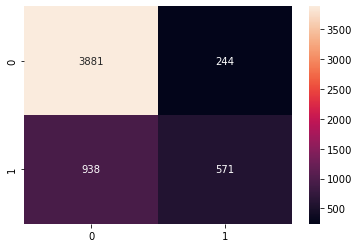

In [35]:
sns.heatmap(cf1 ,annot=True, fmt = 'd')

In [36]:
increased = df1.sample(df1.shape[0], replace = True)

In [37]:
high = pd.concat([increased,df0])

In [38]:
X_high = high.drop("Churn", axis = 1)
y_high = high.Churn

In [39]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.20, random_state=42)

In [40]:
model.fit(X_high_train, y_high_train, epochs = 200)

Epoch 1/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7948
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7875
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7909
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7909
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7920
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7861
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7854
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7877
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7934
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4527 - accura

177/177 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7923
Epoch 82/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7973
Epoch 83/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7914
Epoch 84/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7913
Epoch 85/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7861
Epoch 86/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7907
Epoch 87/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7927
Epoch 88/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7888
Epoch 89/200
177/177 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7827
Epoch 90/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 

177/177 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7914
Epoch 161/200
177/177 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7911
Epoch 162/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7843
Epoch 163/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7914
Epoch 164/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7923
Epoch 165/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7930
Epoch 166/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7909
Epoch 167/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7993
Epoch 168/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7906
Epoch 169/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4586 - a

In [41]:
model.evaluate(X_high_test, y_high_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7906


[0.436977744102478, 0.7906316518783569]

In [42]:
y_high_pred = model.predict(X_high_train)

177/177 [==============================] - 0s 1ms/step


In [43]:
y_high_predict = []
for i in y_high_pred:
    if i < 0.5:
        y_high_predict.append(0)
    else:
        y_high_predict.append(1)    

In [44]:
cf2 = tf.math.confusion_matrix(labels = y_high_train, predictions = y_high_predict)

<AxesSubplot:>

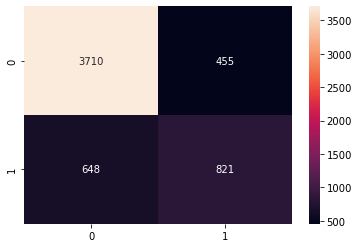

In [45]:
sns.heatmap(cf2 ,annot=True, fmt = 'd')